In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#loading the data
df=pd.read_csv('C:/Users/abc/Desktop/Urban Company Analytics Internship Test - Data.csv')

In [4]:
#Exploratory Data Analysis

In [5]:
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,20-05-2018,21-05-2018,D,14
1,CHWFD,1,23-09-2018,23-09-2018,C,8
2,DYDMF,2,10-11-2018,13-11-2018,C,11
3,EZYSA,3,12-04-2018,16-04-2018,B,8
4,HWAKX,3,05-08-2018,06-08-2018,B,11


In [6]:
df.shape

(30940, 6)

In [7]:
df.columns

Index(['Transaction_ID', 'Profile ID', 'Date_of_Booking',
       'Date_of_Service_Requested', 'Source',
       'Slot of Booking (Hour of the Day)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Transaction_ID                     30940 non-null  object
 1   Profile ID                         30940 non-null  int64 
 2   Date_of_Booking                    30940 non-null  object
 3   Date_of_Service_Requested          30940 non-null  object
 4   Source                             30940 non-null  object
 5   Slot of Booking (Hour of the Day)  30940 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [9]:
#number of missing values in each column
df_missing=df.isna()
df_missing.sum()

Transaction_ID                       0
Profile ID                           0
Date_of_Booking                      0
Date_of_Service_Requested            0
Source                               0
Slot of Booking (Hour of the Day)    0
dtype: int64

In [10]:
#check for any duplicate values
df.duplicated().sum()

0

In [11]:
df['Source'].value_counts()

C    10502
D     7727
B     7582
A     5129
Name: Source, dtype: int64

In [12]:
df['Profile ID'].value_counts().head()

9066     56
9695     52
3659     49
7385     46
16693    46
Name: Profile ID, dtype: int64

In [13]:
df['Date_of_Booking'] = pd.to_datetime(df['Date_of_Booking'], format='%d-%m-%Y',dayfirst=True) 

In [14]:
#Convert values by to_datetime, then to months by dt.month and count by value_counts
#no. of bookings made in each month
s = df['Date_of_Booking'].dt.month.value_counts()
print(s)

12    2761
10    2680
1     2675
7     2616
3     2600
11    2577
6     2571
8     2556
5     2510
9     2508
4     2483
2     2403
Name: Date_of_Booking, dtype: int64


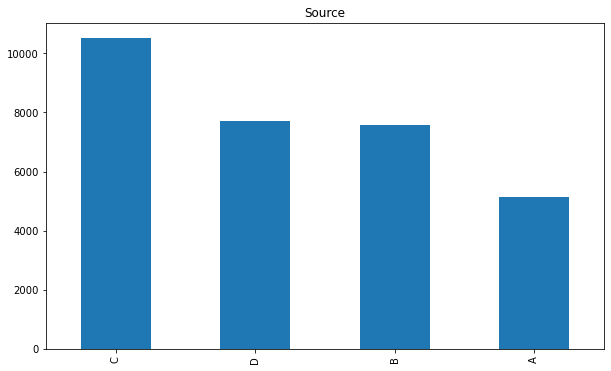

In [15]:
#Channel C is used the highest no of times by all the customers
df['Source'].value_counts().plot.bar(figsize=(10,6), title= 'Source') 

In [16]:
#most recent order date per customer
df['most_recent_date'] = df.groupby(['Profile ID'])['Date_of_Booking'].transform('max') 
df['most_recent_date'].head()

0   2018-09-23
1   2018-09-23
2   2018-11-10
3   2018-08-05
4   2018-08-05
Name: most_recent_date, dtype: datetime64[ns]

In [17]:
df['month'] = pd.DatetimeIndex(df['Date_of_Booking']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Booking']).year

In [18]:
#Plot new users acquired every month on a bar chart 
#(New user in a month = a customer who has placed a request for the first time in this month)

In [19]:
new_customers_every_month=(df
     .groupby(['Profile ID'], as_index=False)['month']  # Group by 'Profile ID' and get first booking month.
     .first()
     .groupby(['month'])  # Group result on 'month' and take counts.
     .count()
     .reindex(df['month'].unique())  # Reindex on original dates.
     .fillna(0))  # Fill null values with zero.

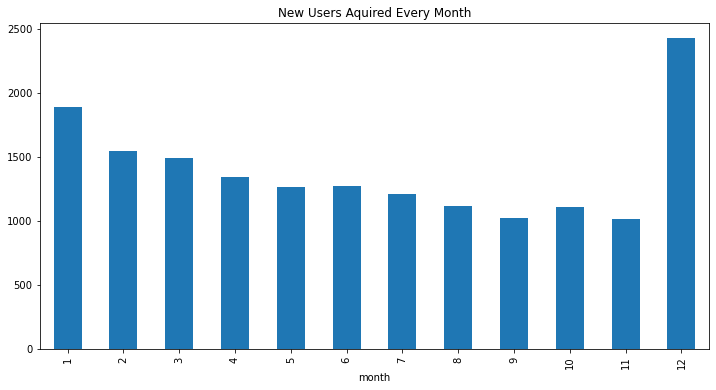

In [20]:
new_customers_every_month.sort_values(by=['month']).plot(kind='bar', figsize=(12,6),legend=None,title="New Users Aquired Every Month")

In [21]:
#30-Day repeat rate is defined as percentage of new users who have placed a 2nd order 
#within 30 days of placing their first order.
#What is the 30-day repeat rate of users acquired in December 2017?"

In [22]:
#30-day repeat rate= new users who have placed a 2nd order within 30 days of placing their first order/total number of customers

In [23]:
#the number of customers who do their first order in December 2017 

In [24]:
#we want a new dataframe with the month and the percentage of recurring customers from the previous month.

In [25]:
min_dates = df.groupby(['Profile ID'])['Date_of_Booking'].min()
min_dates.head()

Profile ID
1   2018-05-20
2   2018-11-10
3   2018-04-12
4   2018-03-02
5   2018-01-06
Name: Date_of_Booking, dtype: datetime64[ns]

In [26]:
df['flag']=df.groupby(['Profile ID']).cumcount().add(1)
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),most_recent_date,month,year,flag
0,BBCHH,1,2018-05-20,21-05-2018,D,14,2018-09-23,5,2018,1
1,CHWFD,1,2018-09-23,23-09-2018,C,8,2018-09-23,9,2018,2
2,DYDMF,2,2018-11-10,13-11-2018,C,11,2018-11-10,11,2018,1
3,EZYSA,3,2018-04-12,16-04-2018,B,8,2018-08-05,4,2018,1
4,HWAKX,3,2018-08-05,06-08-2018,B,11,2018-08-05,8,2018,2


In [27]:
df1 = df[(df.month == 12) & (df.year==2017)].copy() #now we select December 2017

In [28]:
df1 = df1[df1.flag == 1].copy() #and filter out non-first orders

In [29]:
df.xs('Profile ID', axis=1)

0            1
1            1
2            2
3            3
4            3
         ...  
30935    16707
30936    16708
30937    16709
30938    16710
30939    16711
Name: Profile ID, Length: 30940, dtype: int64

In [30]:
#Now we fill a column with True if it finds an order from the same person next month
df1['recurr_30'] = df1.apply(lambda x: True if len(df[(df.month == x.month + 1)&(df.xs('Profile ID', axis=1) == x.xs('Profile ID'))])>0 else False, axis=1)

In [31]:
#per-month groupby with count / sum of true/falses 
df2 = df1[['month','Profile ID','recurr_30']].groupby('month').agg({'Profile ID':'count','recurr_30':'sum'})
df2

,Profile ID,recurr_30
month,,
12,2424,False


In [32]:
#add a new column giving the ratio
df2['percentage_of_repeating_customer'] = (df2.recurr_30/df2.xs('Profile ID', axis=1))*100
df2['percentage_of_repeating_customer']

month
12    0.0
Name: percentage_of_repeating_customer, dtype: float64

In [33]:
#Now, for each month, the "Profile ID" column has the number of first orders 
#and "recurr_30" column has number of those that ordered again the following month. 

In [34]:
#Thus,the 30-day repeat rate for December, 2017 is 0% (0/100).

In [35]:
#What is the 90-day repeat rate of users acquired in Jan,Feb,March 2018?

In [36]:
df3 = df[(df.month != 12) & (df.year==2018)].copy() #now we select everything but December
df3 = df3[df3.flag == 1].copy() #and filter out non-first orders

#fill a column with True if it finds an order from the same person next 90 days

df3['recurr_90'] = df3.apply(lambda x: True if len(df[(df.month == x.month + 3)&(df.xs('Profile ID', axis=1) == x.xs('Profile ID'))])>0 else False, axis=1)
df4 = df3[['month','Profile ID','recurr_90']].groupby('month').agg({'Profile ID':'count','recurr_90':'sum'})
df4

,Profile ID,recurr_90
month,,
1,1892,198.0
2,1549,132.0
3,1490,109.0
4,1346,81.0
5,1264,74.0
6,1273,65.0
7,1208,56.0
8,1120,38.0
9,1020,0.0


In [37]:
df4['percentage_of_repeating_customer'] = (df4.recurr_90/df4.xs('Profile ID', axis=1))*100
df4['percentage_of_repeating_customer']

month
1     10.465116
2      8.521627
3      7.315436
4      6.017831
5      5.854430
6      5.106049
7      4.635762
8      3.392857
9      0.000000
10     0.000000
11     0.000000
Name: percentage_of_repeating_customer, dtype: float64

In [38]:
#Thus,the 90-day repeat rate for January, Febuary and March 2018 is 10%, 8% and 7%, respectively.

In [39]:
#Plot the distribution of users by frequency of their 90-day repeat (Number of times user repeated within first 90 days)

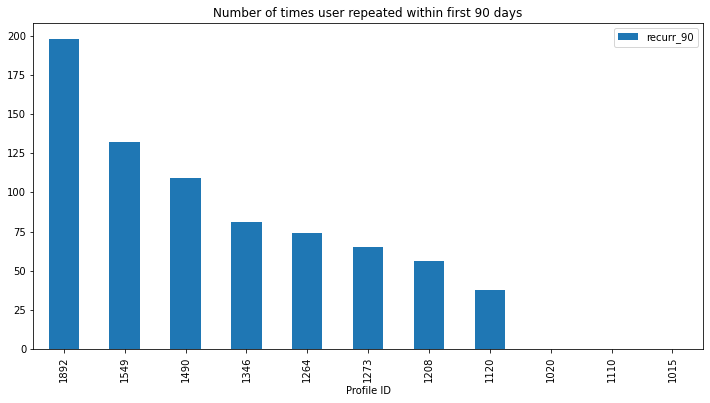

In [40]:
df4.plot(x="Profile ID", y="recurr_90", kind="bar",figsize=(12,6),title="Number of times user repeated within first 90 days")

In [41]:
#"Use logistic regression to predict the 90-day repeat of users acquired in November 2018.
#Hint: Use Source, Slot of Booking, Gap between date of Booking and date of service requested as predictor variables"

In [42]:
#Categorical to numerical
df['Source'] = df['Source'].astype('category') 
df['Source'] = df['Source'].cat.codes
df['Source']

0        3
1        2
2        2
3        1
4        1
        ..
30935    2
30936    0
30937    2
30938    2
30939    1
Name: Source, Length: 30940, dtype: int8

In [43]:
import datetime as dt
df.Date_of_Service_Requested = pd.to_datetime(df.Date_of_Service_Requested)
df.Date_of_Booking = pd.to_datetime(df.Date_of_Booking)

In [44]:
df['gap'] = (df['Date_of_Service_Requested']-df['Date_of_Booking']).abs()
df.head()   

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),most_recent_date,month,year,flag,gap
0,BBCHH,1,2018-05-20,2018-05-21,3,14,2018-09-23,5,2018,1,1 days
1,CHWFD,1,2018-09-23,2018-09-23,2,8,2018-09-23,9,2018,2,0 days
2,DYDMF,2,2018-11-10,2018-11-13,2,11,2018-11-10,11,2018,1,3 days
3,EZYSA,3,2018-04-12,2018-04-16,1,8,2018-08-05,4,2018,1,4 days
4,HWAKX,3,2018-08-05,2018-06-08,1,11,2018-08-05,8,2018,2,58 days


In [45]:
df9 = df[(df.month != 11) & ((df.year==2018)|(df.year==2017))].copy() # we select everything but November
df9 = df9[df9.flag == 1].copy() #and filter out non-first orders

#Repeating the aforementioned steps

df9['recurr_90_train'] = df9.apply(lambda x: True if len(df[(df.month == x.month + 3)&(df.xs('Profile ID', axis=1) == x.xs('Profile ID'))])>0 else False, axis=1)
df7 = df9[['month','Profile ID','recurr_90_train']].groupby('month').agg({'Profile ID':'count','recurr_90_train':'sum'})
df7

,Profile ID,recurr_90_train
month,,
1,1892,198.0
2,1549,132.0
3,1490,109.0
4,1346,81.0
5,1264,74.0
6,1273,65.0
7,1208,56.0
8,1120,38.0
9,1020,0.0


In [46]:
#count the no. of bookings per product_id/customer
df['no_of_bookings'] = df.groupby('Profile ID')['Profile ID'].transform('count')

In [47]:
#identifying customers who have made repeat purchases using the boolean 1
df['repeat'] = df['no_of_bookings'].apply(lambda x: 1 if x > 1 else 0)
df['repeat']

0        1
1        1
2        0
3        1
4        1
        ..
30935    1
30936    0
30937    0
30938    0
30939    0
Name: repeat, Length: 30940, dtype: int64

In [48]:
#Building the logistic regression model

In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [50]:
##defining features and target

In [51]:
X = df[['Source','Slot of Booking (Hour of the Day)','gap']].values 
y = df['repeat'].values

In [57]:
#I’ll just split into two datasets train (70%) and testing (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

logisticModel = LogisticRegression()

#training data with logistic regression model 
logisticModel.fit(X_train,y_train)

#predicting 
predicts = logisticModel.predict(X_test)

#test model accuracy 
from sklearn.metrics import classification_report 

(classification_report(y_test,predicts)) 
print("Accuracy:", accuracy_score(y_test, predicts))

TypeError: float() argument must be a string or a number, not 'Timedelta'